<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [374]:
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv("auto-mpg.data", header=None, delim_whitespace=True)
df.columns = col_names
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [376]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')


In [377]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [378]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Here we can see there are 6 null values in **horsepower** column so we will replace them with mean value but after removing the outliers if exists

In [379]:
df.duplicated().sum()

0

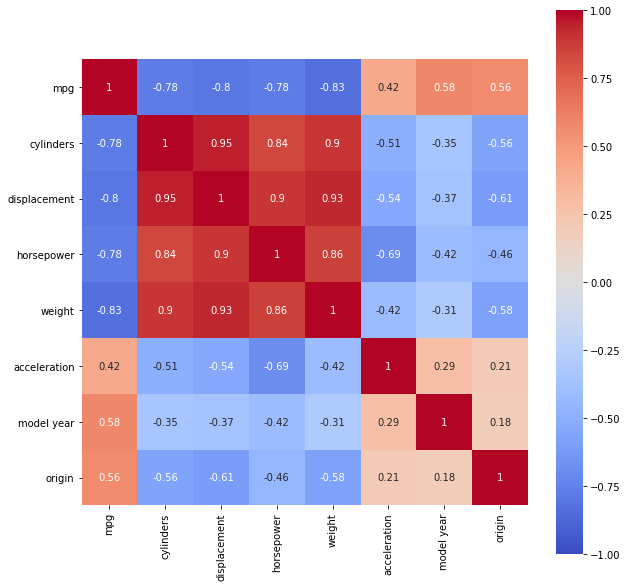

In [380]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

Here we can see the **cylinders** and **displacement** and **horsepower** and **weight** are the most correlated features with **mpg**

<AxesSubplot:>

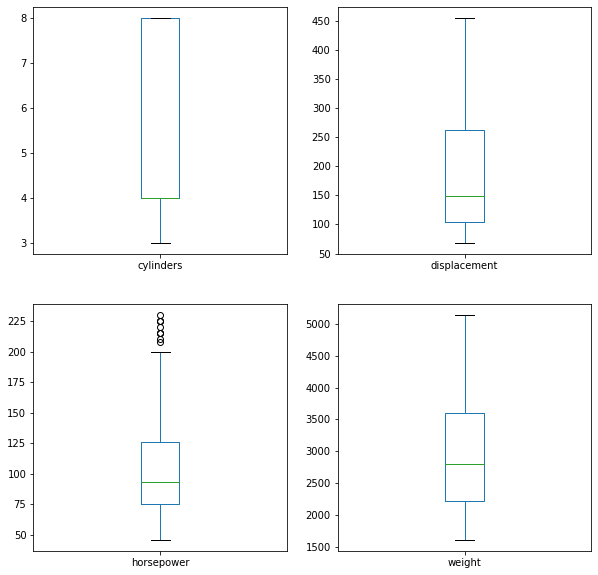

In [381]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['cylinders'].plot(ax=axes[0,0],kind='box',figsize=(10,10))
df['displacement'].plot(ax=axes[0,1],kind='box',figsize=(10,10))
df['horsepower'].plot(ax=axes[1,0],kind='box',figsize=(10,10))
df['weight'].plot(ax=axes[1,1],kind='box',figsize=(10,10))


So here we can see there are outliers in **horsepower** therefore we can replace them by median for example or we can drop them.And because the outliers aren't too much we choose to drop them

In [382]:
Q1=df['horsepower'].quantile(0.25)
Q3=df['horsepower'].quantile(0.75)
IQR=Q3-Q1
print("Old Shape: ", df.shape) 
not_outliers = df['horsepower'].between((Q1-1.5*IQR),(Q3+1.5*IQR))
df = df[not_outliers]
print("New Shape: ", df.shape) 

Old Shape:  (398, 9)
New Shape:  (382, 9)


Now we can replace the null values in **horsepower** column with the mean value

In [383]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

<ipython-input-383-d57d4f7b4bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())


Now we choose to try every one of the 4 features individually as x for the linear regression model

### First we start with **cylinders** feature

In [384]:
x = np.array(df['cylinders']).reshape(len(df),1) #independent variable array
y = np.array(df['mpg'])  #dependent variable vector

In [385]:
test_list=[0.1,0.2,0.3,0.4,0.5]
train_sc_l=[]
test_sc_l=[]
for t in test_list:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=t,random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train,y_train)
    train_sc=regressor.score(x_train, y_train)
    train_sc_l.append(train_sc)
    test_sc=regressor.score(x_test, y_test)
    test_sc_l.append(test_sc)
    print(f'score for training set for {t} test size :', train_sc)
    print(f'score for testing set for {t} test size :', test_sc,'\n')
print("The average R-Squared score for trainig set : ",(sum(train_sc_l)/len(train_sc_l)))
print("The average R-Squared score for trainig set : ",(sum(test_sc_l)/len(test_sc_l)))

score for training set for 0.1 test size : 0.6006097080379107
score for testing set for 0.1 test size : 0.3933149258365276 

score for training set for 0.2 test size : 0.6061990895286555
score for testing set for 0.2 test size : 0.49151019367069915 

score for training set for 0.3 test size : 0.6259075540981751
score for testing set for 0.3 test size : 0.487860011532128 

score for training set for 0.4 test size : 0.6259944744426447
score for testing set for 0.4 test size : 0.5317608488906376 

score for training set for 0.5 test size : 0.6202970332035084
score for testing set for 0.5 test size : 0.5558862796656479 

The average R-Squared score for trainig set :  0.6158015718621789
The average R-Squared score for trainig set :  0.49206645191912807


Here we can see the best test size for this case is **0.5**

In [386]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

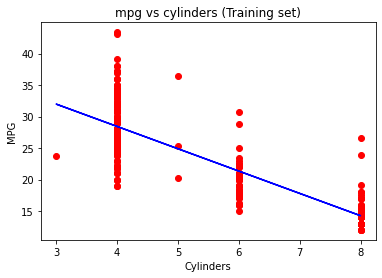

In [387]:
#plot for the TRAIN
 
plt.scatter(x_train, y_train, color='red') # plotting the observation line
 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("mpg vs cylinders (Training set)") # stating the title of the graph
 
plt.xlabel("Cylinders") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

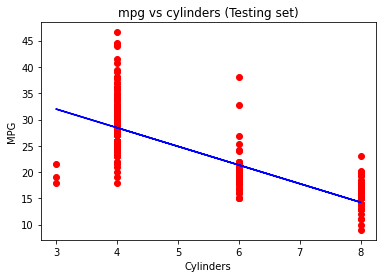

In [388]:
#plot for the Test
 
plt.scatter(x_test, y_test, color='red') # plotting the observation line
 
plt.plot(x_test, regressor.predict(x_test), color='blue') # plotting the regression line
 
plt.title("mpg vs cylinders (Testing set)") # stating the title of the graph
 
plt.xlabel("Cylinders") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

### Then we try  **displacement** feature

In [389]:
x = np.array(df['displacement']).reshape(len(df),1) #independent variable array
y = np.array(df['mpg'])  #dependent variable vector

In [390]:
test_list=[0.1,0.2,0.3,0.4,0.5]
train_sc_l=[]
test_sc_l=[]
for t in test_list:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=t,random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train,y_train)
    train_sc=regressor.score(x_train, y_train)
    train_sc_l.append(train_sc)
    test_sc=regressor.score(x_test, y_test)
    test_sc_l.append(test_sc)
    print(f'score for training set for {t} test size :', train_sc)
    print(f'score for testing set for {t} test size :', test_sc,'\n')
print("The average R-Squared score for trainig set : ",(sum(train_sc_l)/len(train_sc_l)))
print("The average R-Squared score for trainig set : ",(sum(test_sc_l)/len(test_sc_l)))

score for training set for 0.1 test size : 0.664816266565538
score for testing set for 0.1 test size : 0.33320077063366826 

score for training set for 0.2 test size : 0.6745685350790414
score for testing set for 0.2 test size : 0.4843297873837249 

score for training set for 0.3 test size : 0.692925060781361
score for testing set for 0.3 test size : 0.5135639335063202 

score for training set for 0.4 test size : 0.6980343441876597
score for testing set for 0.4 test size : 0.5663123407303655 

score for training set for 0.5 test size : 0.6884821157646728
score for testing set for 0.5 test size : 0.6009670164633112 

The average R-Squared score for trainig set :  0.6837652644756547
The average R-Squared score for trainig set :  0.49967476974347813


Here we can see the best test size for this case is **0.4**

In [391]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

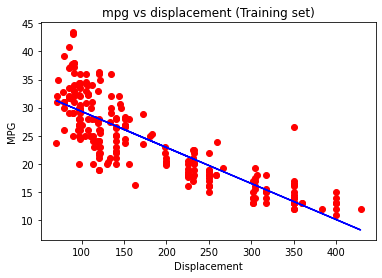

In [392]:
#plot for the TRAIN
 
plt.scatter(x_train, y_train, color='red') # plotting the observation line
 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("mpg vs displacement (Training set)") # stating the title of the graph
 
plt.xlabel("Displacement") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

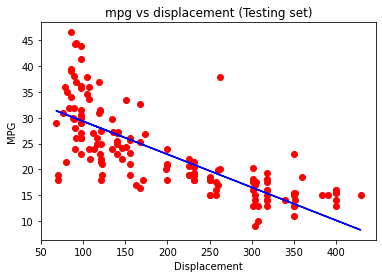

In [393]:
#plot for the Test
 
plt.scatter(x_test, y_test, color='red') # plotting the observation line
 
plt.plot(x_test, regressor.predict(x_test), color='blue') # plotting the regression line
 
plt.title("mpg vs displacement (Testing set)") # stating the title of the graph
 
plt.xlabel("Displacement") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

### Then we try  **horsepower** feature

In [394]:
x = np.array(df['horsepower']).reshape(len(df),1) #independent variable array
y = np.array(df['mpg'])  #dependent variable vector

In [395]:
test_list=[0.1,0.2,0.3,0.4,0.5]
train_sc_l=[]
test_sc_l=[]
for t in test_list:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=t,random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train,y_train)
    train_sc=regressor.score(x_train, y_train)
    train_sc_l.append(train_sc)
    test_sc=regressor.score(x_test, y_test)
    test_sc_l.append(test_sc)
    print(f'score for training set for {t} test size :', train_sc)
    print(f'score for testing set for {t} test size :', test_sc,'\n')
print("The average R-Squared score for trainig set : ",(sum(train_sc_l)/len(train_sc_l)))
print("The average R-Squared score for trainig set : ",(sum(test_sc_l)/len(test_sc_l)))

score for training set for 0.1 test size : 0.6257438580584436
score for testing set for 0.1 test size : 0.5656177481499072 

score for training set for 0.2 test size : 0.6328146818572982
score for testing set for 0.2 test size : 0.5650164589879672 

score for training set for 0.3 test size : 0.6414602399160758
score for testing set for 0.3 test size : 0.5662328577046495 

score for training set for 0.4 test size : 0.6587395123494245
score for testing set for 0.4 test size : 0.5682844636778295 

score for training set for 0.5 test size : 0.6477255462190907
score for testing set for 0.5 test size : 0.5969066562045624 

The average R-Squared score for trainig set :  0.6412967676800665
The average R-Squared score for trainig set :  0.5724116369449831


Here we can see the best test size for this case is **0.5**

In [396]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

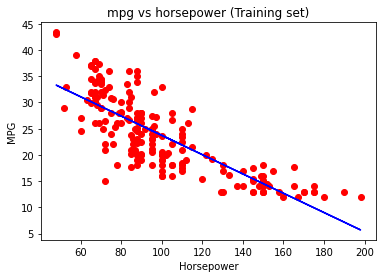

In [397]:
#plot for the TRAIN
 
plt.scatter(x_train, y_train, color='red') # plotting the observation line
 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("mpg vs horsepower (Training set)") # stating the title of the graph
 
plt.xlabel("Horsepower") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

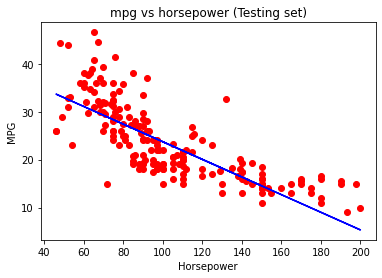

In [398]:
#plot for the Test
 
plt.scatter(x_test, y_test, color='red') # plotting the observation line
 
plt.plot(x_test, regressor.predict(x_test), color='blue') # plotting the regression line
 
plt.title("mpg vs horsepower (Testing set)") # stating the title of the graph
 
plt.xlabel("Horsepower") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

### Finally we try  **weight** feature

In [399]:
x = np.array(df['weight']).reshape(len(df),1) #independent variable array
y = np.array(df['mpg'])  #dependent variable vector

In [400]:
test_list=[0.1,0.2,0.3,0.4,0.5]
train_sc_l=[]
test_sc_l=[]
for t in test_list:
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=t,random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train,y_train)
    train_sc=regressor.score(x_train, y_train)
    train_sc_l.append(train_sc)
    test_sc=regressor.score(x_test, y_test)
    test_sc_l.append(test_sc)
    print(f'score for training set for {t} test size :', train_sc)
    print(f'score for testing set for {t} test size :', test_sc,'\n')
print("The average R-Squared score for trainig set : ",(sum(train_sc_l)/len(train_sc_l)))
print("The average R-Squared score for trainig set : ",(sum(test_sc_l)/len(test_sc_l)))

score for training set for 0.1 test size : 0.6903744033683898
score for testing set for 0.1 test size : 0.5634907327715692 

score for training set for 0.2 test size : 0.6986290949320566
score for testing set for 0.2 test size : 0.6022369448846073 

score for training set for 0.3 test size : 0.7046769419559342
score for testing set for 0.3 test size : 0.6245160522969351 

score for training set for 0.4 test size : 0.7177542600900358
score for testing set for 0.4 test size : 0.6332961664661971 

score for training set for 0.5 test size : 0.7048071508849085
score for testing set for 0.5 test size : 0.6617047072288891 

The average R-Squared score for trainig set :  0.7032483702462651
The average R-Squared score for trainig set :  0.6170489207296395


Here we can see the best test size for this case is **0.5**

In [401]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

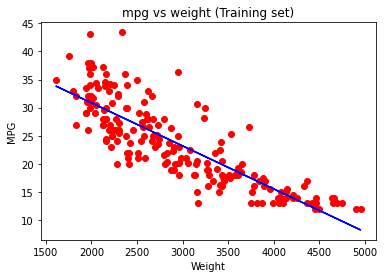

In [402]:
#plot for the TRAIN
 
plt.scatter(x_train, y_train, color='red') # plotting the observation line
 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("mpg vs weight (Training set)") # stating the title of the graph
 
plt.xlabel("Weight") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

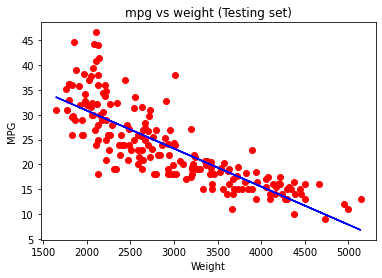

In [403]:
#plot for the Test
 
plt.scatter(x_test, y_test, color='red') # plotting the observation line
 
plt.plot(x_test, regressor.predict(x_test), color='blue') # plotting the regression line
 
plt.title("mpg vs weight (Testing set)") # stating the title of the graph
 
plt.xlabel("Weight") # adding the name of x-axis
plt.ylabel("MPG") # adding the name of y-axis
plt.show() # specifies end of graph

### so we can choose horsepower , displacement and weight to be the best 3 features for expressing the mpg

As we expect from EDA the the best 3 feature individually would give not-bad prediction because their correlation with target is very good but ofcourse we didn't expect to get a high score because we depend on them individually

## Implementation of multivariate linear regression

In [404]:
# Normalize the features
x = df[['displacement','horsepower','weight']]
y = df.mpg
x_norm = (x - x.mean()) / x.std() # pandas automatically take the mean and std for every feature in the dataframe
y_norm = (y - y.mean()) / y.std()

In [405]:
# Create x, y and theta
x_norm=np.array(x_norm)
x_norm=np.c_[np.ones(len(x_norm)),x_norm]
y_norm=np.array(y_norm).reshape(len(y_norm),1)
thetas=np.zeros(x_norm.shape[1]).reshape(x_norm.shape[1],1)

In [406]:
print(x_norm.shape)
print(y_norm.shape)
print(thetas.shape)

(382, 4)
(382, 1)
(4, 1)


In [407]:
def lossFunction(y_predict,y):
    m=len(y)
    return (1/(2*m))*sum((y_predict-y)**2)

def batchGD(x,y,b,alpha,max_iters):
    m=len(y)
    cost_list=[]
    gradients=[0]*len(b)
    for _ in range(max_iters):
        y_predict=np.dot(x,b)
        cost=lossFunction(y_predict,y)
        cost_list.append(cost)
        for i in range(len(b)):
            gradients[i]=(1/m)*sum((y_predict-y)*x[:,i].reshape(len(x),1))
            b[i]=b[i]-alpha*gradients[i]
    return b,cost_list

In [408]:
class LinearRegression:
    
    def __init__(self):
        self.theta=[]
        self.cost=[]
        
    def train(self,x,y,b,alpha,max_iters):
        self.theta,self.cost=batchGD(x,y,b,alpha,max_iters)
    
    def test(self,x):
        return x.dot(self.theta)

In [409]:
# Train
model = LinearRegression()
model.train(x_norm, y_norm, thetas, 0.1, 1000)
model.theta

array([[ 4.10433758e-16],
       [-8.01865439e-02],
       [-2.57540506e-01],
       [-5.24689521e-01]])

In [410]:
# test
y_predicted=model.test(x_norm) # normalized predicted y
y_predicted_normal=(y_predicted*y.std())+y.mean() # normal predicted y without normalization
print(y_predicted_normal)

[[18.56578759]
 [15.33716911]
 [17.66787054]
 [17.76996666]
 [18.28526392]
 [ 9.75125247]
 [12.8652593 ]
 [15.47747385]
 [16.10174219]
 [15.56367957]
 [27.3571415 ]
 [24.5679111 ]
 [24.73448961]
 [26.34186654]
 [29.04950809]
 [32.93586144]
 [26.3710265 ]
 [27.40103635]
 [27.39862793]
 [26.93714721]
 [25.75864837]
 [10.22514683]
 [ 8.90654823]
 [29.04950809]
 [28.0083183 ]
 [28.06264755]
 [25.0400281 ]
 [20.84915166]
 [21.52261259]
 [22.35233663]
 [21.83585479]
 [12.80910577]
 [10.66643477]
 [13.76976882]
 [14.43430115]
 [ 8.07638066]
 [ 9.57541945]
 [ 7.35447582]
 [22.68953   ]
 [28.34897474]
 [21.75288192]
 [23.15093029]
 [28.5687391 ]
 [28.84895158]
 [30.482403  ]
 [30.12159182]
 [32.29764907]
 [32.84282141]
 [32.12707885]
 [30.99051273]
 [27.81768017]
 [29.53094523]
 [30.4180737 ]
 [27.30281225]
 [28.53934301]
 [12.49064818]
 [11.05348323]
 [14.24322659]
 [13.89225251]
 [16.59902259]
 [11.95479832]
 [11.88956761]
 [10.00040529]
 [27.71511077]
 [15.52116613]
 [15.65557514]
 [14.14531

In [411]:
y=np.array(y).reshape(len(y),1)
ss_tot=sum((y-y.mean())**2)
ss_res=sum((y-y_predicted_normal)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.70058548]
